In [6]:
!pip install openai

In [7]:
import torch
vers = torch.__version__
print("Torch vers: ", vers)

# PyG installation
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-${TORCH}+${CUDA}.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-${TORCH}+${CUDA}.html
!pip install -q git+https://github.com/rusty1s/pytorch_geometric.git

import torch_geometric

Torch vers:  2.0.1+cu118
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [8]:
!pip install ogb

In [9]:
import os
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sp
import torch
from torch import Tensor
import torch_geometric
from torch_geometric.utils import to_networkx
from torch_geometric.datasets import Planetoid
import networkx as nx
from networkx.algorithms import community
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data_dir = "./data"
os.makedirs(data_dir, exist_ok=True)

In [79]:
dataset = Planetoid(root=data_dir, name='Cora')
data = dataset[0]

In [81]:
print(f'Number of nodes: {data.num_nodes}')
# Number of nodes: 2708

Number of nodes: 2708


In [82]:
print(f'Number of edges: {data.num_edges}')
# Number of edges: 10556

Number of edges: 10556


In [83]:
print(f'Number of features: {data.num_node_features}')
# Number of edge features: 0

Number of features: 1433


In [84]:
print(f'Number of classes: {dataset.num_classes}')
# Number of classes: 7

Number of classes: 7


In [85]:
label_dict = {
    0: "Theory",
    1: "Reinforcement_Learning",
    2: "Genetic_Algorithms",
    3: "Neural_Networks",
    4: "Probabilistic_Methods",
    5: "Case_Based",
    6: "Rule_Learning"}
data.y[:10]

tensor([3, 4, 4, 0, 3, 2, 0, 3, 3, 2])

{3: 818, 4: 426, 0: 351, 2: 418, 1: 217, 5: 298, 6: 180}


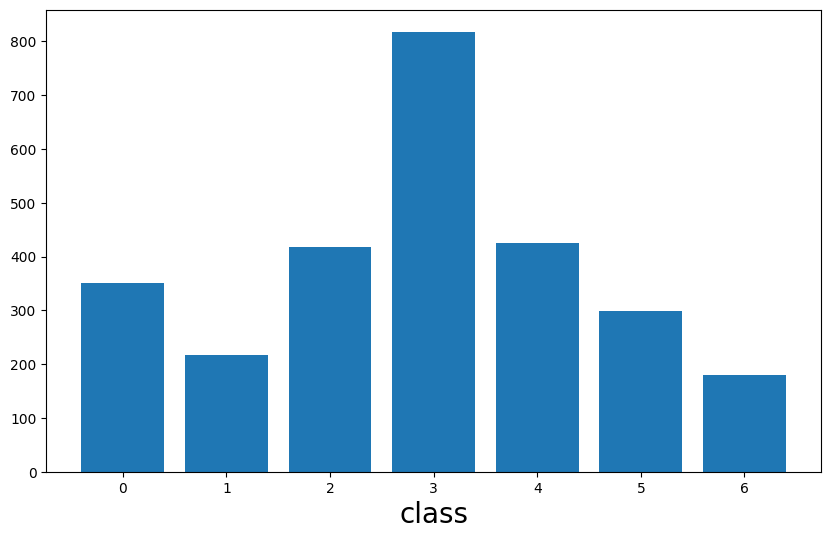

In [86]:
counter = collections.Counter(data.y.numpy())
counter = dict(counter)
print(counter)
count = [x[1] for x in sorted(counter.items())]
plt.figure(figsize=(10, 6))
plt.bar(range(7), count)
plt.xlabel("class", size=20)
plt.show()

In [87]:
print(f'Has isolated nodes: {data.has_isolated_nodes()}')  # False
print(f'Has self-loops: {data.has_self_loops()}')  # False
print(f'Is undirected: {data.is_undirected()}')  # True

Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [88]:
edge_index = data.edge_index.numpy()
print(edge_index.shape)
edge_example = edge_index[:, np.where(edge_index[0]==30)[0]]
edge_example

(2, 10556)


array([[  30,   30,   30,   30,   30,   30],
       [ 697,  738, 1358, 1416, 2162, 2343]])

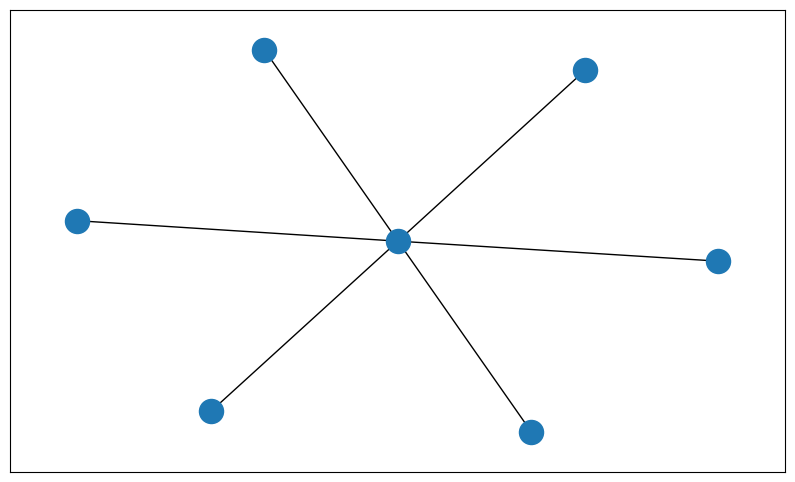

In [89]:
node_example = np.unique(edge_example.flatten())
plt.figure(figsize=(10, 6))
G = nx.Graph()
G.add_nodes_from(node_example)
G.add_edges_from(list(zip(edge_example[0], edge_example[1])))
nx.draw_networkx(G, with_labels=False)

In [90]:
# Number of nodes to sample around
num_nodes_to_sample = 10

# List to store sampled graphs
graph_list = []

# Convert the PyG graph to NetworkX graph
nx_graph = to_networkx(data, to_undirected=True)

# Sample 10 nodes and create a graph centered around each node
for center_node in range(num_nodes_to_sample):
    sampled_subgraph = nx.ego_graph(nx_graph, center_node, radius=1, undirected=True)
    graph_list.append(sampled_subgraph)

# Print out the labels associated with each node in the graph list
for i, graph in enumerate(graph_list):
    print(f"Graph {i+1} Node Labels:")
    for node in graph.nodes():
        edge_list = list(graph.edges())

        # Convert the edge list information into text
        edgelist_converted = ''
        for edge in edge_list:
            source, target = edge
            edgelist_converted += f'Node {source} is connected to Node {target}. '

        label = data.y[node].item()  # Extract node label
        print(f"Node {node}: Label {label}")
    print("Edge list:", edgelist_converted)
    print("="*30)


print("Converted edge list:", edgelist_converted)

Graph 1 Node Labels:
Node 0: Label 3
Node 633: Label 3
Node 1862: Label 3
Node 2582: Label 3
Edge list: Node 0 is connected to Node 633. Node 0 is connected to Node 1862. Node 0 is connected to Node 2582. Node 1862 is connected to Node 2582. 
Graph 2 Node Labels:
Node 1: Label 4
Node 2: Label 4
Node 652: Label 4
Node 654: Label 4
Edge list: Node 1 is connected to Node 2. Node 1 is connected to Node 652. Node 1 is connected to Node 654. 
Graph 3 Node Labels:
Node 1: Label 4
Node 2: Label 4
Node 1666: Label 3
Node 1986: Label 3
Node 332: Label 3
Node 1454: Label 4
Edge list: Node 1 is connected to Node 2. Node 2 is connected to Node 332. Node 2 is connected to Node 1454. Node 2 is connected to Node 1666. Node 2 is connected to Node 1986. 
Graph 4 Node Labels:
Node 2544: Label 0
Node 3: Label 0
Edge list: Node 2544 is connected to Node 3. 
Graph 5 Node Labels:
Node 2176: Label 3
Node 1761: Label 2
Node 4: Label 3
Node 1256: Label 3
Node 1016: Label 3
Node 2175: Label 2
Edge list: Node 217

Edge list: [(1, 2), (2, 332), (2, 1454), (2, 1666), (2, 1986)]
Converted edge list: Node 1 is connected to Node 2. Node 2 is connected to Node 332. Node 2 is connected to Node 1454. Node 2 is connected to Node 1666. Node 2 is connected to Node 1986. 


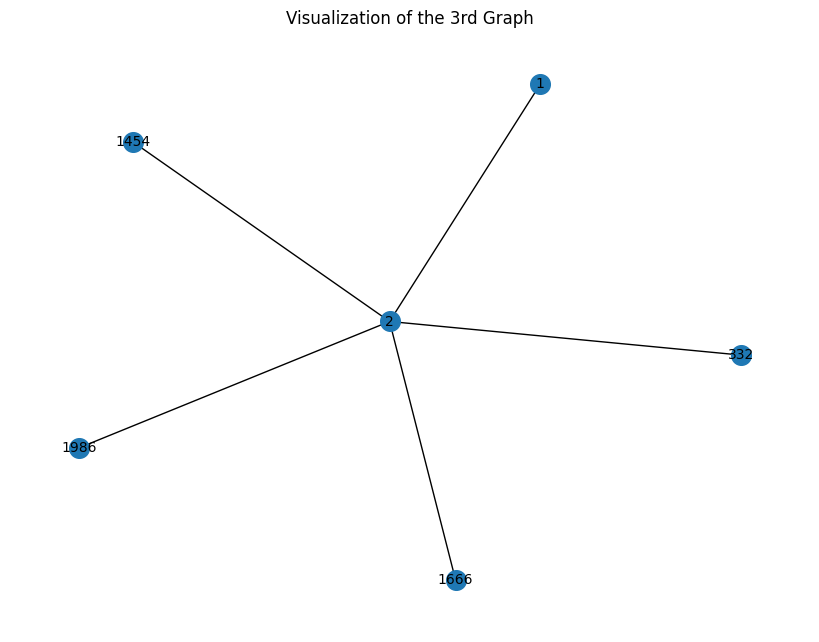

In [91]:
import matplotlib.pyplot as plt
import networkx as nx

# Get the 3rd graph from the list
graph_to_visualize = graph_list[2]
# Get the edge list as a list of tuples
edge_list = list(graph_to_visualize.edges())

print("Edge list:", edge_list)

# Convert the edge list information into text
edgelist_converted = ''
for edge in edge_list:
    source, target = edge
    edgelist_converted += f'Node {source} is connected to Node {target}. '

print("Converted edge list:", edgelist_converted)


# Create a plot
plt.figure(figsize=(8, 6))

# Draw the graph using NetworkX's draw function
pos = nx.spring_layout(graph_to_visualize, seed=42)  # Layout for node positions
nx.draw(graph_to_visualize, pos, with_labels=True, node_size=200, font_size=10, font_color='black')

# Set plot title
plt.title("Visualization of the 3rd Graph")

# Show the plot
plt.show()


### Prompting ###

In [92]:
import openai
import os
api_key = os.environ.get("OPENAI_API_KEY")
openai.api_key = api_key

In [93]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

CORA

In [94]:
text = f"""
Graph 3 Node Labels:
Node 1: Label 4
Node 2: Label 4
Node 1666: Label ?
Node 1986: Label 3
Node 332: Label 3
Node 1454: Label 4
Edge list: Node 1 is connected to Node 2. Node 2 is connected to Node 332. Node 2 is connected to Node 1454. Node 2 is connected to Node 1666. Node 2 is connected to Node 1986.
"""
prompt = f"""
Task : Node Label Prediction (Predict the label of the node marked with a ?, in the format "Label of Node = " : <predicted label>) given the connectivity and label information in the text enclosed in triple backticks.
```{text}```
"""
response = get_completion(prompt)
print(response)

Label of Node 1666 = 4


In [95]:
import random

# Print out the labels associated with each node in the graph list
for i, graph in enumerate(graph_list):
    text = ""
    ground_truth = ""
    text += f"Graph {i+1} Node Labels:" + "\n"

    # Randomly choose a node to have a "?" label
    node_with_question_mark = random.choice(list(graph.nodes()))

    for node in graph.nodes():
        edge_list = list(graph.edges())
        # Convert the edge list information into text
        edgelist_converted = ''
        for edge in edge_list:
            source, target = edge
            edgelist_converted += f'Node {source} is connected to Node {target}. '

        if node == node_with_question_mark:
            ground_truth = data.y[node].item()
            label = "?"
        else:
            label = data.y[node].item()  # Extract node label
        text += f"Node {node}: Label {label}" + "\n"

    text += "Edge list: " + edgelist_converted + "\n"
    print("Ground_truth --", ground_truth)
    # print("Edge list:", edgelist_converted)
    print(text)
    prompt = f"""
    Task : Node Label Prediction (Predict the label of the node marked with a ?, in the format "Label of Node = " : <predicted label>) given the connectivity and label information in the text enclosed in triple backticks.
    ```{text}```
    """
    response = get_completion(prompt)
    print("RESPONSE --> ", response)
    print("="*30)


Ground_truth -- 3
Graph 1 Node Labels:
Node 0: Label 3
Node 633: Label 3
Node 1862: Label 3
Node 2582: Label ?
Edge list: Node 0 is connected to Node 633. Node 0 is connected to Node 1862. Node 0 is connected to Node 2582. Node 1862 is connected to Node 2582. 

RESPONSE -->  Label of Node 2582 = Label 3
Ground_truth -- 4
Graph 2 Node Labels:
Node 1: Label 4
Node 2: Label 4
Node 652: Label ?
Node 654: Label 4
Edge list: Node 1 is connected to Node 2. Node 1 is connected to Node 652. Node 1 is connected to Node 654. 

RESPONSE -->  Label of Node 652 = 4
Ground_truth -- 3
Graph 3 Node Labels:
Node 1: Label 4
Node 2: Label 4
Node 1666: Label ?
Node 1986: Label 3
Node 332: Label 3
Node 1454: Label 4
Edge list: Node 1 is connected to Node 2. Node 2 is connected to Node 332. Node 2 is connected to Node 1454. Node 2 is connected to Node 1666. Node 2 is connected to Node 1986. 

RESPONSE -->  Label of Node 1666 = 4
Ground_truth -- 0
Graph 4 Node Labels:
Node 2544: Label 0
Node 3: Label ?
Edge l

OGBN- aRXIV

In [96]:
import torch
from ogb.nodeproppred import PygNodePropPredDataset
from torch_geometric.utils import to_networkx
import networkx as nx

# Load the OGBN_ARXIV dataset
dataset = PygNodePropPredDataset(name='ogbn-arxiv')

# Get the graph
graph = dataset[0]


In [97]:
graph

Data(num_nodes=169343, edge_index=[2, 1166243], x=[169343, 128], node_year=[169343, 1], y=[169343, 1])

In [98]:
# Count the number of distinct y labels
num_distinct_labels = torch.unique(graph.y).size(0)
print("Total number of distinct y labels:", num_distinct_labels)

Total number of distinct y labels: 40


In [99]:
print(f'Number of nodes: {graph.num_nodes}')
# Number of nodes: 2708

Number of nodes: 169343


In [100]:
print(f'Number of edges: {graph.num_edges}')
# Number of edges: 10556

Number of edges: 1166243


In [101]:
print(f'Number of features: {graph.num_node_features}')
print(f'Has isolated nodes: {graph.has_isolated_nodes()}')  # False
print(f'Has self-loops: {graph.has_self_loops()}')  # False
print(f'Is undirected: {graph.is_undirected()}')  # False

Number of features: 128
Has isolated nodes: False
Has self-loops: False
Is undirected: False


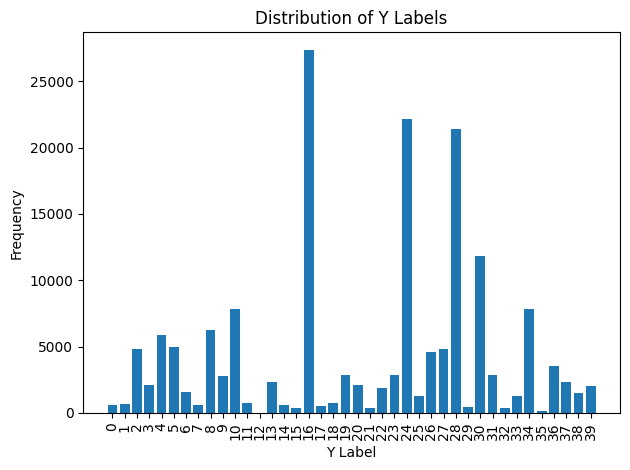

In [102]:
# Count the occurrences of each y label
label_counts = torch.bincount(graph.y.view(-1))

# Create a bar chart with rotated x-axis labels
plt.bar(range(len(label_counts)), label_counts.numpy())
plt.xlabel('Y Label')
plt.ylabel('Frequency')
plt.title('Distribution of Y Labels')
plt.xticks(range(len(label_counts)), rotation=90)  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout for better readability
plt.show()

In [103]:
# Create a dictionary to store y labels for each node in each subgraph
y_labels_dict = {}

# Sample 10 nodes randomly
num_nodes_to_sample = 10
sampled_indices = torch.randint(0, graph.num_nodes, (num_nodes_to_sample,))
#print(sampled_indices)

# Convert the PyG graph to NetworkX graph
nx_graph = to_networkx(graph, to_undirected=True)

# Convert sampled indices to integers, list of center nodes
nx_ids = [int(node_id.item()) for node_id in sampled_indices]

# Create a list to store ego graphs centered around sampled nodes
graph_list = []

# Sample 10 nodes and create a graph centered around each node
for center_node in nx_ids:
    sampled_subgraph = nx.ego_graph(nx_graph, center_node, radius=1, undirected=True)
    y_labels_dict[center_node] = {}  # Initialize dictionary for this center node
    for node in sampled_subgraph.nodes():
        y_labels_dict[center_node][node] = graph.y[node].item()  # Store y label
    graph_list.append(sampled_subgraph)


In [104]:
print(y_labels_dict)

{71576: {109198: 16, 129294: 16, 91922: 16, 86551: 16, 71576: 17, 146593: 16, 153897: 16, 75313: 16, 125362: 16, 135860: 16, 167239: 16, 119625: 17, 164435: 16, 75475: 16, 106204: 16, 160734: 17, 98272: 16, 130020: 16, 83813: 16, 160621: 16, 89075: 16, 105341: 16}, 126223: {11457: 28, 71036: 28, 126223: 28}, 168130: {108614: 22, 168130: 22, 48908: 20, 35806: 22}, 165257: {165257: 16, 166955: 24}, 98912: {98912: 24, 74290: 24, 64445: 24, 97223: 24}, 29623: {136644: 16, 29623: 16}, 162798: {3537: 34, 162798: 34}, 8594: {157123: 28, 145273: 28, 129133: 28, 59758: 28, 157681: 28, 8594: 28, 10705: 28, 47313: 28, 31893: 28, 139795: 28, 50521: 28, 16028: 28, 91453: 28}, 137668: {53538: 28, 57987: 28, 137668: 28, 87499: 8, 149848: 28}, 61443: {38944: 28, 61443: 28, 69956: 8}}


In [105]:
# Iterate through the list of ego graphs and print attributes
for idx, ego_graph in enumerate(graph_list):
    text = ""
    ground_truth = ""
    text += f"Ego Graph {idx+1} Attributes:" + "\n"

    center_node = nx_ids[idx]  # Get the central node for this ego graph
    text+= f"Ego Graph {idx+1} - Central Node: " + str(center_node) + "\n"
    #print("Total Number of nodes:", ego_graph.number_of_nodes())
    #print("Total Number of edges:", ego_graph.number_of_edges())

    # Randomly choose a node to have a "?" label
    node_with_question_mark = random.choice(list(ego_graph.nodes()))
    ground_truth = y_labels_dict[center_node][node_with_question_mark]
    edge_list = list(ego_graph.edges())
    text+="Ego graph Edgelist: "+ str(edge_list)+"\n"
    text+="Ego graph node and label information : "+"\n"
    for node in ego_graph.nodes():
        if node == node_with_question_mark:
            label = "?"
        else:
            label = y_labels_dict[center_node][node]

        text += f"Node {node}: Label {label}" + "\n"

    #print(text)
    #---- prompting ---
    prompt = f"""
    Task : Node Label Prediction (Predict the label of the node marked with a ?, in the format "Label of Node = " : <predicted label>) given the connectivity and label information in the text enclosed in triple backticks.
    ```{text}```
    """
    print(prompt)
    response = get_completion(prompt)
    print("*"*30)
    print("Node with ?", node_with_question_mark, "Ground Truth Label", ground_truth)
    print("*"*30)
    print("RESPONSE --> ", response)
    print("="*30)


    Task : Node Label Prediction (Predict the label of the node marked with a ?, in the format "Label of Node = " : <predicted label>) given the connectivity and label information in the text enclosed in triple backticks.
    ```Ego Graph 1 Attributes:
Ego Graph 1 - Central Node: 71576
Ego graph Edgelist: [(109198, 167239), (109198, 160621), (109198, 160734), (109198, 146593), (109198, 71576), (129294, 71576), (91922, 130020), (91922, 160621), (91922, 71576), (86551, 98272), (86551, 106204), (86551, 75475), (86551, 71576), (71576, 98272), (71576, 89075), (71576, 106204), (71576, 164435), (71576, 130020), (71576, 153897), (71576, 167239), (71576, 83813), (71576, 160621), (71576, 119625), (71576, 160734), (71576, 105341), (71576, 146593), (71576, 135860), (71576, 75313), (71576, 125362), (71576, 75475), (146593, 105341), (146593, 75475), (153897, 105341), (153897, 125362), (125362, 130020), (135860, 130020), (167239, 160734), (167239, 105341), (167239, 75475), (164435, 106204), (75475, 

### Misc Prompting Examples ###

In [ ]:
prompt = f"""
Generate a list of three made-up book titles along \
with their authors and genres.
Provide them in JSON format with the following keys:
book_id, title, author, genre.
"""
response = get_completion(prompt)
print(response)

{
  "books": [
    {
      "book_id": 1,
      "title": "The Enigma of Elysium",
      "author": "Evelyn Sinclair",
      "genre": "Mystery"
    },
    {
      "book_id": 2,
      "title": "Whispers in the Wind",
      "author": "Nathaniel Blackwood",
      "genre": "Fantasy"
    },
    {
      "book_id": 3,
      "title": "Echoes of the Past",
      "author": "Amelia Hart",
      "genre": "Romance"
    }
  ]
}


In [ ]:
text_1 = f"""
Making a cup of tea is easy! First, you need to get some \
water boiling. While that's happening, \
grab a cup and put a tea bag in it. Once the water is \
hot enough, just pour it over the tea bag. \
Let it sit for a bit so the tea can steep. After a \
few minutes, take out the tea bag. If you \
like, you can add some sugar or milk to taste. \
And that's it! You've got yourself a delicious \
cup of tea to enjoy.
"""
prompt = f"""
You will be provided with text delimited by triple quotes.
If it contains a sequence of instructions, \
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \
then simply write \"No steps provided.\"

\"\"\"{text_1}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 1:")
print(response)

Completion for Text 1:
Step 1 - Get some water boiling.
Step 2 - Grab a cup and put a tea bag in it.
Step 3 - Once the water is hot enough, pour it over the tea bag.
Step 4 - Let it sit for a bit so the tea can steep.
Step 5 - After a few minutes, take out the tea bag.
Step 6 - If you like, add some sugar or milk to taste.
Step 7 - Enjoy your delicious cup of tea.


In [ ]:
text_2 = f"""
The sun is shining brightly today, and the birds are \
singing. It's a beautiful day to go for a \
walk in the park. The flowers are blooming, and the \
trees are swaying gently in the breeze. People \
are out and about, enjoying the lovely weather. \
Some are having picnics, while others are playing \
games or simply relaxing on the grass. It's a \
perfect day to spend time outdoors and appreciate the \
beauty of nature.
"""
prompt = f"""
You will be provided with text delimited by triple quotes.
If it contains a sequence of instructions, \
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \
then simply write \"No steps provided.\"

\"\"\"{text_2}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 2:")
print(response)

Completion for Text 2:
No steps provided.


In [ ]:
prompt = f"""
Your task is to answer in a consistent style.

<child>: Teach me about patience.

<grandparent>: The river that carves the deepest \
valley flows from a modest spring; the \
grandest symphony originates from a single note; \
the most intricate tapestry begins with a solitary thread.

<child>: Teach me about resilience.
"""
response = get_completion(prompt)
print(response)

<grandparent>: Resilience is like a mighty oak tree that withstands the strongest storms, bending but never breaking. It is the unwavering determination to rise again after every fall, and the ability to find strength in the face of adversity. Just as a diamond is formed under immense pressure, resilience is forged through challenges and hardships, making us stronger and more resilient in the process.


In [ ]:
text = f"""
In a charming village, siblings Jack and Jill set out on \
a quest to fetch water from a hilltop \
well. As they climbed, singing joyfully, misfortune \
struck—Jack tripped on a stone and tumbled \
down the hill, with Jill following suit. \
Though slightly battered, the pair returned home to \
comforting embraces. Despite the mishap, \
their adventurous spirits remained undimmed, and they \
continued exploring with delight.
"""
# example 1
prompt_1 = f"""
Perform the following actions:
1 - Summarize the following text delimited by triple \
backticks with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the following \
keys: french_summary, num_names.

Separate your answers with line breaks.

Text:
```{text}```
"""
response = get_completion(prompt_1)
print("Completion for prompt 1:")
print(response)

Completion for prompt 1:
1 - Jack and Jill, siblings, go on a quest to fetch water from a hilltop well, but encounter misfortune along the way.
2 - Jack et Jill, frère et sœur, partent à la recherche d'eau d'un puits au sommet d'une colline, mais rencontrent des malheurs en chemin.
3 - Jack, Jill
4 - {
    "french_summary": "Jack et Jill, frère et sœur, partent à la recherche d'eau d'un puits au sommet d'une colline, mais rencontrent des malheurs en chemin.",
    "num_names": 2
}


In [ ]:
prompt_2 = f"""
Your task is to perform the following actions:
1 - Summarize the following text delimited by
  <> with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the
  following keys: french_summary, num_names.

Use the following format:
Text: <text to summarize>
Summary: <summary>
Translation: <summary translation>
Names: <list of names in Italian summary>
Output JSON: <json with summary and num_names>

Text: <{text}>
"""
response = get_completion(prompt_2)
print("\nCompletion for prompt 2:")
print(response)


Completion for prompt 2:
Summary: Jack and Jill, siblings, go on a quest to fetch water from a hilltop well but encounter misfortune along the way.

Translation: Jack et Jill, frère et sœur, partent en quête d'eau d'un puits au sommet d'une colline mais rencontrent des malheurs en chemin.

Names: Jack, Jill

Output JSON: {"french_summary": "Jack et Jill, frère et sœur, partent en quête d'eau d'un puits au sommet d'une colline mais rencontrent des malheurs en chemin.", "num_names": 2}


In [ ]:
prompt = f"""
Determine if the student's solution is correct or not.

Question:
I'm building a solar power installation and I need \
 help working out the financials.
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations
as a function of the number of square feet.

Student's Solution:
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
"""
response = get_completion(prompt)
print(response)

The student's solution is correct. They correctly identified the costs for land, solar panels, and maintenance, and calculated the total cost as a function of the number of square feet.


In [ ]:
prompt = f"""
Your task is to determine if the student's solution \
is correct or not.
To solve the problem do the following:
- First, work out your own solution to the problem.
- Then compare your solution to the student's solution \
and evaluate if the student's solution is correct or not.
Don't decide if the student's solution is correct until
you have done the problem yourself.

Use the following format:
Question:
```
question here
```
Student's solution:
```
student's solution here
```
Actual solution:
```
steps to work out the solution and your solution here
```
Is the student's solution the same as actual solution \
just calculated:
```
yes or no
```
Student grade:
```
correct or incorrect
```

Question:
```
I'm building a solar power installation and I need help \
working out the financials.
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations \
as a function of the number of square feet.
```
Student's solution:
```
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
```
Actual solution:
"""
response = get_completion(prompt)
print(response)

To calculate the total cost for the first year of operations, we need to add up the costs of land, solar panels, and maintenance.

Let x be the size of the installation in square feet.

Costs:
1. Land cost: $100 * x
2. Solar panel cost: $250 * x
3. Maintenance cost: $100,000 + $10 * x

Total cost: $100 * x + $250 * x + $100,000 + $10 * x = $360 * x + $100,000

Is the student's solution the same as the actual solution just calculated:
Yes

Student grade:
Correct


In [ ]:
prompt = f"""
Tell me about AeroGlide UltraSlim Smart Toothbrush by Boie
"""
response = get_completion(prompt)
print(response)

The AeroGlide UltraSlim Smart Toothbrush by Boie is a technologically advanced toothbrush designed to provide a superior brushing experience. Boie is a company known for its innovative oral care products, and the AeroGlide UltraSlim Smart Toothbrush is no exception.

One of the standout features of this toothbrush is its ultra-slim design. The brush head is only 2mm thick, making it much thinner than traditional toothbrushes. This slim profile allows for better access to hard-to-reach areas of the mouth, ensuring a thorough and effective clean.

The AeroGlide UltraSlim Smart Toothbrush also incorporates smart technology. It connects to a mobile app via Bluetooth, allowing users to track their brushing habits and receive personalized recommendations for improving their oral hygiene routine. The app provides real-time feedback on brushing technique, duration, and coverage, helping users to achieve optimal oral health.

The toothbrush features soft, antimicrobial bristles made from a dura